<a href="https://colab.research.google.com/github/Joe-hyper/DSW9C/blob/main/Python_Notebook_IP_Week_9_Core_2_(Spam_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question**

### a) Specifying the question
      Classify if an email is spam or not.

### b) Defining the metric for success
      Build a model that accurately predicts if an email is spam or not.

### c) Understanding the context
      The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

      Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


### d) Recording the experimental design
      * Define the question, the metric for success, the context, experimental design taken.
      * Read and explore the given dataset.
      * Define the appropriateness of the available data to answer the given question.
      * Find and deal with outliers, anomalies, and missing data within the dataset.
      * Implement a Naive bayes classifier.
      * Split datasets i.e 70-30, 60-40, 80-20
      * Compute the accuracy (percentage of correct classification).  
      * Report the confusion matrix of each classifier.
      * Apply at least one of the optimization techniques that you learned earlier this week.
      * Provide further recommendations to improve both classifiers.



### e) Glossary (column names)
      word_freq_make:         
      word_freq_address:      
      word_freq_all:          
      word_freq_3d:           
      word_freq_our:          
      word_freq_over:         
      word_freq_remove:       
      word_freq_internet:     
      word_freq_order:        
      word_freq_mail:         
      word_freq_receive:      
      word_freq_will:         
      word_freq_people:       
      word_freq_report:       
      word_freq_addresses:    
      word_freq_free:         
      word_freq_business:     
      word_freq_email:        
      word_freq_you:          
      word_freq_credit:       
      word_freq_your:         
      word_freq_font:         
      word_freq_000:          
      word_freq_money:        
      word_freq_hp:          
      word_freq_hpl:          
      word_freq_george:       
      word_freq_650:          
      word_freq_lab:          
      word_freq_labs:         
      word_freq_telnet:       
      word_freq_857:          
      word_freq_data:         
      word_freq_415:          
      word_freq_85:           
      word_freq_technology:   
      word_freq_1999:         
      word_freq_parts:        
      word_freq_pm:           
      word_freq_direct:       
      word_freq_cs:           
      word_freq_meeting:      
      word_freq_original:     
      word_freq_project:      
      word_freq_re:           
      word_freq_edu:          
      word_freq_table:        
      word_freq_conference:  
      char_freq_;:            
      char_freq_(:            
      char_freq_[:            
      char_freq_!:            
      char_freq_$:           
      char_freq_#:          
      capital_run_length_average
      capital_run_length_longest
      capital_run_length_total:


# **2. Importing Libraries**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# **3. Reading the Data**

In [7]:
# from the uci repository, documentation on our attributes is provided
emaildf = pd.read_csv('spambase.data', sep=',', names = ['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'Type?'])

emaildf.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type?
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# **4. Checking the Data**

In [8]:
# shape of data
emaildf.shape

(4601, 58)

In [9]:
# lets check the info of the dataset
emaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

      All data types are in numerical form.

In [10]:
# checking columns of the dataset
emaildf.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [11]:
# last 5 rows of dataset
emaildf.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type?
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


# **5. Tidying the Data**

In [13]:
# confirming whether duplicates exist
emaildf.duplicated().any().any()

True

In [19]:
# dropping duplicates
emaildf = emaildf.drop_duplicates()

In [20]:
# confirming if duplicates have been dropped.
emaildf.duplicated().sum()

0

In [21]:
# missing values
emaildf.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

      We dont have any missing values in our dataset

In [24]:

# removing white spaces, lowering case of all columns to achieve uniformity; replacing spaces
emaildf.columns = emaildf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


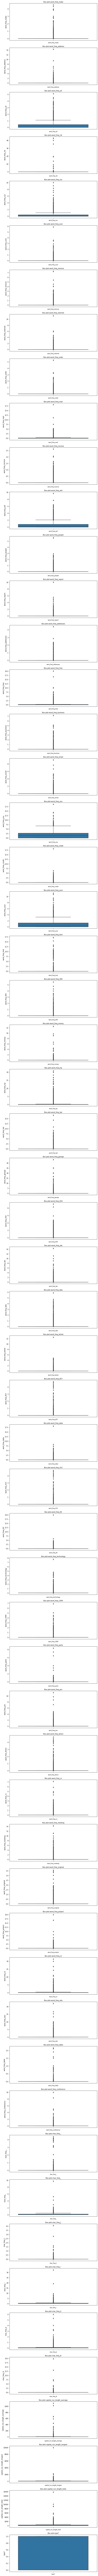

In [25]:
# checking for outliers
# 

plt.show()

fig, ax = plt.subplots(len(emaildf.columns), figsize = (10, 300))

for i, col_val in enumerate(emaildf.columns):

  sns.boxplot(y= emaildf[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

# **6. Analysis**

### Numerical variables

**Measures of central tendency**

In [58]:
# lets get a list of our numerical columns
numerical = list(emaildf.select_dtypes(include = ['integer',  'float']).columns)
numerical

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_',
 'char_freq_[',
 'char_freq_!',
 'cha

In [59]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, emaildf):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {emaildf[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {emaildf[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {emaildf[column].mode()}")

In [60]:
# Mean
MeasureCentral('mean', numerical, emaildf)

word_freq_make column mean = 0.10436579572446555
word_freq_address column mean = 0.11265558194774354
word_freq_all column mean = 0.29147268408551075
word_freq_3d column mean = 0.06307838479809978
word_freq_our column mean = 0.32532066508313484
word_freq_over column mean = 0.09665558194774354
word_freq_remove column mean = 0.11747505938242277
word_freq_internet column mean = 0.1079999999999999
word_freq_order column mean = 0.09185985748218521
word_freq_mail column mean = 0.24842042755344448
word_freq_receive column mean = 0.05668646080760094
word_freq_will column mean = 0.5652042755344422
word_freq_people column mean = 0.09765558194774338
word_freq_report column mean = 0.061211401425178134
word_freq_addresses column mean = 0.04480285035629459
word_freq_free column mean = 0.2538289786223281
word_freq_business column mean = 0.14915439429928737
word_freq_email column mean = 0.18875534441805233
word_freq_you column mean = 1.718368171021377
word_freq_credit column mean = 0.08496199524940615


In [61]:
# Median
MeasureCentral('median', numerical, emaildf)

word_freq_make column median = 0.0
word_freq_address column median = 0.0
word_freq_all column median = 0.0
word_freq_3d column median = 0.0
word_freq_our column median = 0.0
word_freq_over column median = 0.0
word_freq_remove column median = 0.0
word_freq_internet column median = 0.0
word_freq_order column median = 0.0
word_freq_mail column median = 0.0
word_freq_receive column median = 0.0
word_freq_will column median = 0.19
word_freq_people column median = 0.0
word_freq_report column median = 0.0
word_freq_addresses column median = 0.0
word_freq_free column median = 0.0
word_freq_business column median = 0.0
word_freq_email column median = 0.0
word_freq_you column median = 1.36
word_freq_credit column median = 0.0
word_freq_your column median = 0.29
word_freq_font column median = 0.0
word_freq_000 column median = 0.0
word_freq_money column median = 0.0
word_freq_hp column median = 0.0
word_freq_hpl column median = 0.0
word_freq_george column median = 0.0
word_freq_650 column median =

**Measures of dispersion**

In [62]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, emaildf):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {emaildf[column].max() - emaildf[column].min()}")
    elif measure == 'IQR':
      Q1 = emaildf[column].quantile(0.25)
      Q3 = emaildf[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {emaildf[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {emaildf[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {emaildf[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {emaildf[column].kurt()}")

In [63]:
# Range
MeasureDistribution('range', numerical, emaildf)

word_freq_make column range = 4.54
word_freq_address column range = 14.28
word_freq_all column range = 5.1
word_freq_3d column range = 42.81
word_freq_our column range = 10.0
word_freq_over column range = 5.88
word_freq_remove column range = 7.27
word_freq_internet column range = 11.11
word_freq_order column range = 5.26
word_freq_mail column range = 18.18
word_freq_receive column range = 2.61
word_freq_will column range = 9.67
word_freq_people column range = 5.55
word_freq_report column range = 10.0
word_freq_addresses column range = 4.41
word_freq_free column range = 20.0
word_freq_business column range = 7.14
word_freq_email column range = 9.09
word_freq_you column range = 18.75
word_freq_credit column range = 18.18
word_freq_your column range = 11.11
word_freq_font column range = 17.1
word_freq_000 column range = 5.45
word_freq_money column range = 12.5
word_freq_hp column range = 20.83
word_freq_hpl column range = 16.66
word_freq_george column range = 33.33
word_freq_650 column ra

In [64]:
# iqr
MeasureDistribution('IQR', numerical, emaildf)

word_freq_make column IQR = 0.0
word_freq_address column IQR = 0.0
word_freq_all column IQR = 0.44
word_freq_3d column IQR = 0.0
word_freq_our column IQR = 0.41
word_freq_over column IQR = 0.0
word_freq_remove column IQR = 0.0
word_freq_internet column IQR = 0.0
word_freq_order column IQR = 0.0
word_freq_mail column IQR = 0.19
word_freq_receive column IQR = 0.0
word_freq_will column IQR = 0.83
word_freq_people column IQR = 0.0
word_freq_report column IQR = 0.0
word_freq_addresses column IQR = 0.0
word_freq_free column IQR = 0.1275
word_freq_business column IQR = 0.0
word_freq_email column IQR = 0.0
word_freq_you column IQR = 2.72
word_freq_credit column IQR = 0.0
word_freq_your column IQR = 1.28
word_freq_font column IQR = 0.0
word_freq_000 column IQR = 0.0
word_freq_money column IQR = 0.0
word_freq_hp column IQR = 0.0975
word_freq_hpl column IQR = 0.0
word_freq_george column IQR = 0.0
word_freq_650 column IQR = 0.0
word_freq_lab column IQR = 0.0
word_freq_labs column IQR = 0.0
word_fr

In [65]:
# variance
MeasureDistribution('var', numerical, emaildf)

word_freq_make column variance = 0.09000293577443848
word_freq_address column variance = 0.20635217642997647
word_freq_all column variance = 0.26596561400775415
word_freq_3d column variance = 1.8292205521818556
word_freq_our column variance = 0.4730759841060102
word_freq_over column variance = 0.07619270862290826
word_freq_remove column variance = 0.157834321663384
word_freq_internet column variance = 0.16833166072701067
word_freq_order column variance = 0.07960511696743483
word_freq_mail column variance = 0.431174102124759
word_freq_receive column variance = 0.0339173381155297
word_freq_will column variance = 0.7788292882687357
word_freq_people column variance = 0.09567226433686292
word_freq_report column variance = 0.11976146872244099
word_freq_addresses column variance = 0.05865404760414314
word_freq_free column variance = 0.636061220447788
word_freq_business column variance = 0.2094609621391449
word_freq_email column variance = 0.29282529769656507
word_freq_you column variance = 3.

In [66]:
# kurtosis
MeasureDistribution('kurt', numerical, emaildf)

word_freq_make column kurt = 54.35140555393713
word_freq_address column kurt = 306.6859733110557
word_freq_all column kurt = 12.941446887016067
word_freq_3d column kurt = 788.3700579065502
word_freq_our column kurt = 37.06480080166446
word_freq_over column kurt = 71.60326696371024
word_freq_remove column kurt = 76.38164731817447
word_freq_internet column kurt = 167.55021940338852
word_freq_order column kurt = 48.011373485980215
word_freq_mail column kurt = 162.53903333498258
word_freq_receive column kurt = 34.65611931939017
word_freq_will column kurt = 12.096068302538724
word_freq_people column kurt = 82.59629686440552
word_freq_report column kurt = 219.64515484234872
word_freq_addresses column kurt = 69.49380879410651
word_freq_free column kurt = 157.6917415736734
word_freq_business column kurt = 43.514184372410874
word_freq_email column kurt = 48.1574607557439
word_freq_you column kurt = 4.998065927313517
word_freq_credit column kurt = 424.6857707931336
word_freq_your column kurt = 8

# **7. Implementing the solution**

## Modelling: Naive Bayes

### Good practice
      * If continuous features don't have normal distribution, we should transform it into normal distribution using a normalizer.
      * Remove correlated features.

In [ ]:
# remove highly correlated features

In [26]:
correlations = emaildf.corr()

In [27]:
# checking for muticloonearity via vif
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type?
word_freq_make,1.101450,-0.004258,-0.016107,-0.001599,0.007134,-0.014006,0.032895,0.048494,-0.061818,-0.005302,...,0.010822,-0.007722,0.021812,-0.019639,-0.017965,0.007037,-0.031584,0.008650,-0.040019,0.017967
word_freq_address,-0.004258,1.107986,0.003902,0.016125,-0.010141,0.016181,-0.037115,0.015532,-0.005847,-0.189242,...,-0.029043,0.044266,0.017044,-0.004061,-0.015979,-0.027783,0.001481,-0.037494,-0.004253,-0.013719
word_freq_all,-0.016107,0.003902,1.096759,0.026681,-0.011308,-0.015840,0.037645,0.033687,-0.020911,0.023795,...,0.004193,-0.012425,0.011985,-0.057687,0.011628,0.008159,-0.089941,-0.006818,-0.000336,-0.074631
word_freq_3d,-0.001599,0.016125,0.026681,1.009493,0.010155,0.021284,0.001560,0.002105,0.011507,0.002516,...,0.008908,0.023760,0.006357,0.014313,0.007629,0.010402,0.013059,-0.033460,-0.003156,-0.082426
word_freq_our,0.007134,-0.010141,-0.011308,0.010155,1.139481,0.001406,-0.046338,0.041085,0.048843,0.004994,...,-0.007988,0.023191,0.000155,0.047257,0.032241,0.007414,-0.036345,-0.023949,0.059177,-0.250952
word_freq_over,-0.014006,0.016181,-0.015840,0.021284,0.001406,1.087195,0.015354,-0.037792,-0.037802,0.041113,...,0.004699,-0.013665,-0.000416,-0.012365,-0.003241,-0.012484,0.053609,-0.035157,0.020631,-0.145078
word_freq_remove,0.032895,-0.037115,0.037645,0.001560,-0.046338,0.015354,1.196243,0.074263,0.022452,-0.003232,...,-0.007121,0.032476,0.002851,0.037879,0.018025,-0.038248,-0.000762,-0.053139,0.120032,-0.382779
word_freq_internet,0.048494,0.015532,0.033687,0.002105,0.041085,-0.037792,0.074263,1.118973,-0.028892,-0.039210,...,-0.001390,0.020886,0.014462,0.018131,0.024737,0.009222,0.015707,-0.007116,0.027861,-0.162059
word_freq_order,-0.061818,-0.005847,-0.020911,0.011507,0.048843,-0.037802,0.022452,-0.028892,1.197584,-0.054166,...,-0.016508,0.070386,-0.037727,0.012577,-0.069566,0.004602,-0.058411,-0.020593,-0.174587,-0.083005
word_freq_mail,-0.005302,-0.189242,0.023795,0.002516,0.004994,0.041113,-0.003232,-0.039210,-0.054166,1.122142,...,-0.017752,0.005341,-0.019418,-0.004889,-0.011857,-0.031523,-0.048536,-0.023833,-0.006017,-0.020153


In [29]:
# Create correlation matrix
corr_matrix = emaildf.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['word_freq_415']

      word_freq_415 column is highly correlated; we therefore have to drop it.

In [33]:
# Drop features (word_freq_415)
emaildf = emaildf.drop(emaildf[to_drop], axis=1)

KeyError: ignored

In [35]:
emaildf.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq

In [36]:
# conducting a normalty test on our data using shapiro-wilk test
# importing the shapiro function
# 
from scipy.stats import shapiro 
stat, p = shapiro(emaildf)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian')


0.03707075119018555 0.0
statistics=0.037, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


      Our distribution isn't normal; we therefore have to normalize.

### a)Splitting data (80-20)

In [37]:
# crafting train and test sets
X = emaildf.iloc[:, :-1].values
y = emaildf.iloc[:, -1].values

In [38]:
# Normalizing our data since it is not normally distributed
# we shall use l2 regularization as ourfeature set is not large in #
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l2')
normalizer.fit_transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [39]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [40]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
837,1,1
838,1,1
839,0,0
840,0,0


In [42]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.8230403800475059

In [43]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842

[[359 136]
 [ 13 334]]
Accuracy score:  0.8230403800475059


      Our accuracy score is 82%

### b) Splitting data (70-30)

In [44]:
# crafting train and test sets
X = emaildf.iloc[:, :-1].values
y = emaildf.iloc[:, -1].values

In [45]:
# Normalizing our data since it is not normally distributed
# we shall use l2 regularization as ourfeature set is not large in #
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l2')
normalizer.fit_transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [46]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [47]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [48]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1258,1,1
1259,1,1
1260,1,1
1261,0,0


In [49]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.833729216152019

In [50]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263

[[542 195]
 [ 15 511]]
Accuracy score:  0.833729216152019


      Our accuracy score is 83.3%

### c) Splitting the data (60-40)

In [51]:
# crafting train and test sets
X = emaildf.iloc[:, :-1].values
y = emaildf.iloc[:, -1].values

In [52]:
# Normalizing our data since it is not normally distributed
# we shall use l2 regularization as ourfeature set is not large in #
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l2')
normalizer.fit_transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [53]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [54]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1679,0,0
1680,1,1
1681,0,1
1682,0,0


In [56]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.836104513064133

In [57]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       994
           1       0.72      0.97      0.83       690

    accuracy                           0.84      1684
   macro avg       0.85      0.86      0.84      1684
weighted avg       0.87      0.84      0.84      1684

[[741 253]
 [ 23 667]]
Accuracy score:  0.836104513064133


      Our accuracy score is 83.6%. This is best performing split.

# **8. Conclusion**
      Splitting the dataset 80-20 had a model accuracy of 82%
      Splitting the dataset 70-30 had a model accuracy of 83.3%
      Splitting the dataset 60-40 had a model accuracy of 83.6%
        Hence our best performing model is the model that was split 

# **9) Follow up questions**

### a). Did we have the right data?
      Yes.

### b). Do we need other data to answer our question?
      No.

### c). Did we have the right question?
      Yes.